# Preprocessing

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import joblib

In [15]:
df = pd.read_csv('cleaned_cars.csv')

df.head()

,url,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4,5,front,134.000000,used,metallic,2011.0,it
1,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4,5,front,160.222222,used,metallic,2010.0,es
2,https://www.autoscout24.com/offers/renault-oth...,renault,clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,5,5,front,120.425532,used,alcantara,1963.0,be
3,https://www.autoscout24.com/offers/opel-antara...,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de


In [16]:
# Drop the url column
df = df.drop('url', axis=1)

df.head()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4,5,front,134.000000,used,metallic,2011.0,it
1,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4,5,front,160.222222,used,metallic,2010.0,es
2,renault,clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,5,5,front,120.425532,used,alcantara,1963.0,be
3,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de


In [17]:
# Use a unique id for each model (brand + model)
df['model'] = df['brand'] + '_' + df['model']

df.head()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,alfa romeo,alfa romeo_159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4,5,front,134.000000,used,metallic,2011.0,it
1,alfa romeo,alfa romeo_159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4,5,front,160.222222,used,metallic,2010.0,es
2,renault,renault_clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,5,5,front,120.425532,used,alcantara,1963.0,be
3,opel,opel_antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,alfa romeo,alfa romeo_giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de


In [18]:
# Shuffle the data
df = df.sample(frac=1, random_state=0)

In [19]:
# Columns to one-hot encode
one_hot_encode_cols = ['brand', 'model', 'fuel_type', 'gearbox', 'color', 'seller', 'body_type', 'drivetrain', 'country', 'condition', 'upholstery_color']

# One-hot encode the columns
df = pd.get_dummies(df, columns=one_hot_encode_cols)

# Model selection

In [20]:
# Split the data into features and target
y = df['price']
X = df.drop('price', axis=1)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print shapes of the training, validation, and testing sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(7920, 1147)
(2641, 1147)
(2640, 1147)
(7920,)
(2641,)
(2640,)


## Random forest

In [21]:
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)

print('Train MSE:', train_mse)
print('Validation MSE:', val_mse)

Train MSE: 6331068.1257335
Validation MSE: 47802657.9817516


In [22]:
# Make predictions on the test set
test_preds = rf.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))  
# r-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(20):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 7072.4273513849075
Test R2: 0.85762197432373
Predicted: 16215.11
Actual: 15900.0

Predicted: 21775.15
Actual: 22995.0

Predicted: 14337.2
Actual: 12900.0

Predicted: 18217.83
Actual: 17900.0

Predicted: 21748.06
Actual: 16990.0

Predicted: 20705.13
Actual: 29900.0

Predicted: 24275.09
Actual: 26900.0

Predicted: 47011.6
Actual: 48990.0

Predicted: 9108.26
Actual: 9800.0

Predicted: 3767.73
Actual: 5500.0

Predicted: 9989.95
Actual: 7900.0

Predicted: 16343.41
Actual: 16990.0

Predicted: 54511.28
Actual: 49990.0

Predicted: 11346.7
Actual: 9799.0

Predicted: 22219.4
Actual: 19950.0

Predicted: 36401.57
Actual: 36950.0

Predicted: 26818.75
Actual: 31500.0

Predicted: 25752.72
Actual: 23785.0

Predicted: 68699.0
Actual: 65500.0

Predicted: 24056.11
Actual: 17980.0

Predicted: 29929.62
Actual: 32980.0

Predicted: 3447.33
Actual: 2690.0

Predicted: 19549.99
Actual: 19800.0

Predicted: 8860.42
Actual: 9800.0

Predicted: 5998.99
Actual: 5800.0

Predicted: 23933.95
Actual: 27280.0



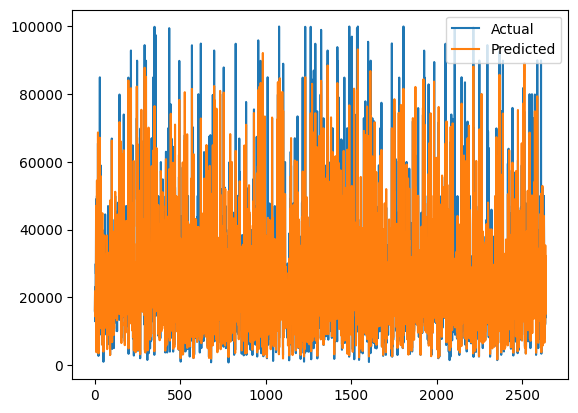

In [23]:
# Plot the comparison between the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()

## XGboost regressor

In [24]:
# Instantiate the model
xgb = XGBRegressor(random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)

print('Train MSE:', train_mse)
print('Validation MSE:', val_mse)

Train MSE: 13202856.395162802
Validation MSE: 42780050.413553335


In [25]:
# Make predictions on the test set
test_preds = xgb.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))

# r-squared
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(20):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 6676.4879015180295
Test R2: 0.8731173884169512
Predicted: 15488.453
Actual: 15900.0

Predicted: 22155.021
Actual: 22995.0

Predicted: 15370.172
Actual: 12900.0

Predicted: 18103.9
Actual: 17900.0

Predicted: 17838.99
Actual: 16990.0

Predicted: 24198.865
Actual: 29900.0

Predicted: 24722.064
Actual: 26900.0

Predicted: 50963.22
Actual: 48990.0

Predicted: 9185.187
Actual: 9800.0

Predicted: 5145.492
Actual: 5500.0

Predicted: 10923.541
Actual: 7900.0

Predicted: 14282.551
Actual: 16990.0

Predicted: 51901.793
Actual: 49990.0

Predicted: 12340.439
Actual: 9799.0

Predicted: 19845.414
Actual: 19950.0

Predicted: 41164.664
Actual: 36950.0

Predicted: 25789.252
Actual: 31500.0

Predicted: 27988.67
Actual: 23785.0

Predicted: 74346.02
Actual: 65500.0

Predicted: 22146.82
Actual: 17980.0



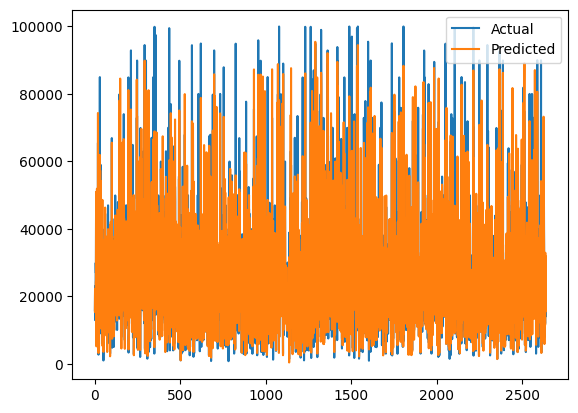

In [26]:
# Plot a comparison of the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()

### Hyperparameters tuning

In [49]:
# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'colsample_bytree': [0.6, 0.8, 1],
    'subsample': [0.6, 0.8, 1],
    'gamma': [0, 1, 5],
}

# Instantiate the model
xgb = XGBRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1; total time=   2.2s
[CV] END colsample_b

/Users/diegofraile/Documents/1_Master/Semestre2/WEM/CarPricePredictor/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1; total time=   2.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1; total time=   2.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1; total time=   2.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.6; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   2.9s
[CV] END colsampl

In [53]:
# Make predictions on the test set
test_preds = grid_search.best_estimator_.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))

# r-squared
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(20):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 6295.44009224348
Test R2: 0.8871872548514456
Predicted: 16656.252
Actual: 15900.0

Predicted: 21640.275
Actual: 22995.0

Predicted: 14838.344
Actual: 12900.0

Predicted: 17731.604
Actual: 17900.0

Predicted: 17559.39
Actual: 16990.0

Predicted: 27501.773
Actual: 29900.0

Predicted: 24490.818
Actual: 26900.0

Predicted: 48399.44
Actual: 48990.0

Predicted: 9271.303
Actual: 9800.0

Predicted: 3881.89
Actual: 5500.0

Predicted: 10366.875
Actual: 7900.0

Predicted: 16835.709
Actual: 16990.0

Predicted: 52744.047
Actual: 49990.0

Predicted: 10905.962
Actual: 9799.0

Predicted: 20854.04
Actual: 19950.0

Predicted: 39917.832
Actual: 36950.0

Predicted: 25666.732
Actual: 31500.0

Predicted: 25412.057
Actual: 23785.0

Predicted: 75248.734
Actual: 65500.0

Predicted: 20830.828
Actual: 17980.0



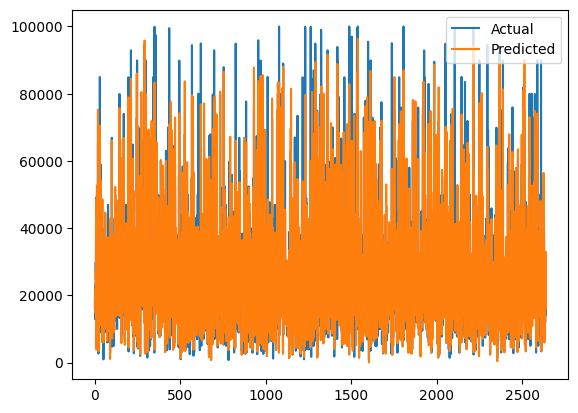

In [54]:
# Plot a comparison of the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()

In [55]:
# Save the model
joblib.dump(grid_search.best_estimator_, 'xgbr_price_predictor.pkl')

['xgbr_price_predictor.pkl']

In [ ]:
# Save the feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')